Predicting Weather of Banglore in 5 days and plotting a time series chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime

In [ ]:
city_name = "Bangalore"
api_key = "e96f9102e03ae29e2365e1e8175c4099"
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city_name}&appid={api_key}&units=metric"

In [ ]:
response = requests.get(url)
weather_data = response.json()

In [ ]:
print(weather_data)

{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1691992800, 'main': {'temp': 27.46, 'feels_like': 28.77, 'temp_min': 26.78, 'temp_max': 27.46, 'pressure': 1015, 'sea_level': 1015, 'grnd_level': 912, 'humidity': 61, 'temp_kf': 0.68}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'clouds': {'all': 60}, 'wind': {'speed': 3.94, 'deg': 276, 'gust': 4.39}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2023-08-14 06:00:00'}, {'dt': 1692003600, 'main': {'temp': 28.51, 'feels_like': 29.04, 'temp_min': 28.51, 'temp_max': 28.87, 'pressure': 1011, 'sea_level': 1011, 'grnd_level': 910, 'humidity': 50, 'temp_kf': -0.36}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'clouds': {'all': 80}, 'wind': {'speed': 4.06, 'deg': 265, 'gust': 4.51}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'd'}, 'dt_txt': '2023-08-14 09:00:00'}, {'dt': 1692014400, 'main': {'temp': 28.67, 'feels_like': 28.45, 

In [ ]:
timestamps = [entry['dt'] for entry in weather_data['list']]
temperatures = [entry['main']['temp'] for entry in weather_data['list']]
humidities = [entry['main']['humidity'] for entry in weather_data['list']]
precipitations = [entry.get('rain', {}).get('3h', 0) for entry in weather_data['list']]  # Rain in last 3 hours

In [ ]:
data = pd.DataFrame({
    'Timestamp': timestamps,
    'Temperature': temperatures,
    'Humidity': humidities,
    'Precipitation': precipitations
})

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')

data.set_index('Timestamp', inplace=True)

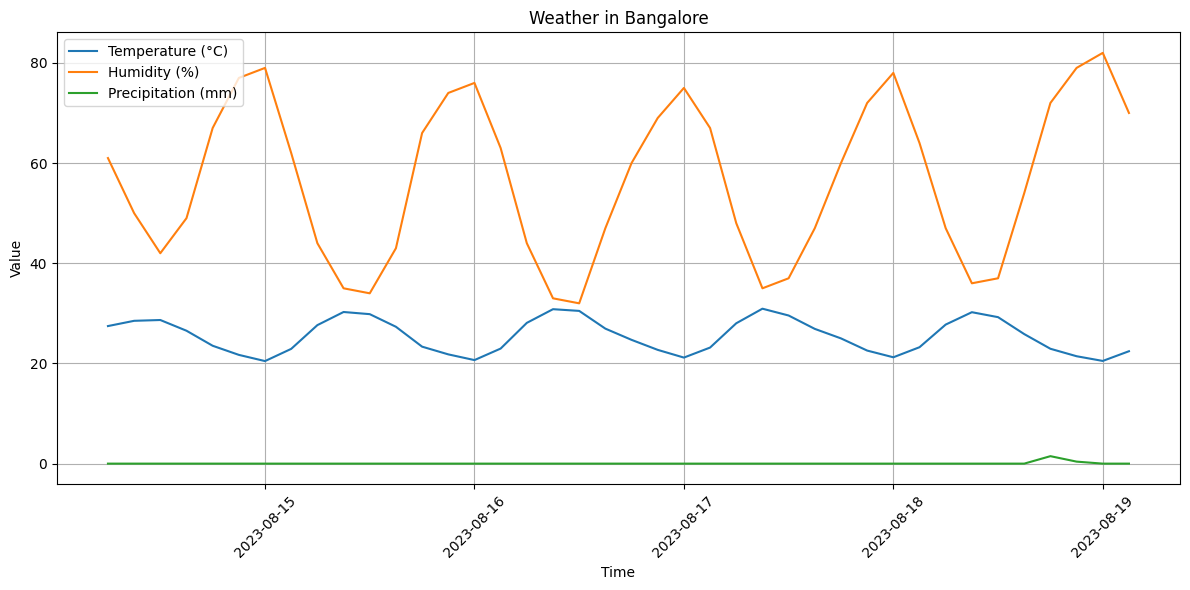

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Temperature'], label='Temperature (°C)')
plt.plot(data['Humidity'], label='Humidity (%)')
plt.plot(data['Precipitation'], label='Precipitation (mm)')
plt.title(f'Weather in {city_name}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
plt.show()

Using ARIMA and SARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model_arima = ARIMA(data['Temperature'], order=(5, 1, 0))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=50)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)


In [ ]:
model_sarima = SARIMAX(data['Temperature'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
model_fit_sarima = model_sarima.fit()
forecast_sarima = model_fit_sarima.get_forecast(steps=50)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


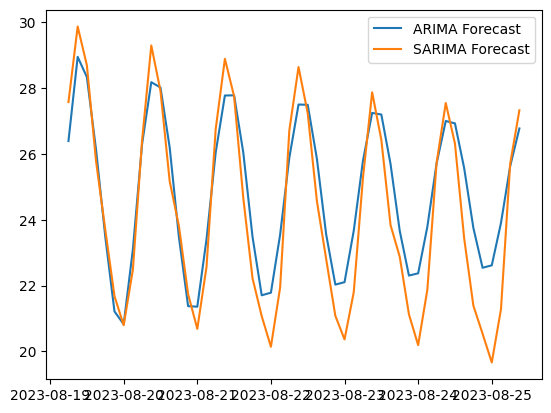

In [ ]:
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.plot(forecast_sarima.predicted_mean, label='SARIMA Forecast')
plt.legend()
plt.show()

Predicting for Future

In [ ]:

future_time_range = pd.date_range(start=data.index[-1], periods=50, freq=data.index.freq)

In [ ]:
forecast_arima = model_fit_arima.forecast(steps=50)
forecast_sarima = model_fit_sarima.get_forecast(steps=50)

In [ ]:
forecast_data = pd.DataFrame({
    'ARIMA_Forecast': forecast_arima,
    'SARIMA_Forecast': forecast_sarima.predicted_mean
}, index=future_time_range)

In [ ]:

combined_data = pd.concat([data, forecast_data])

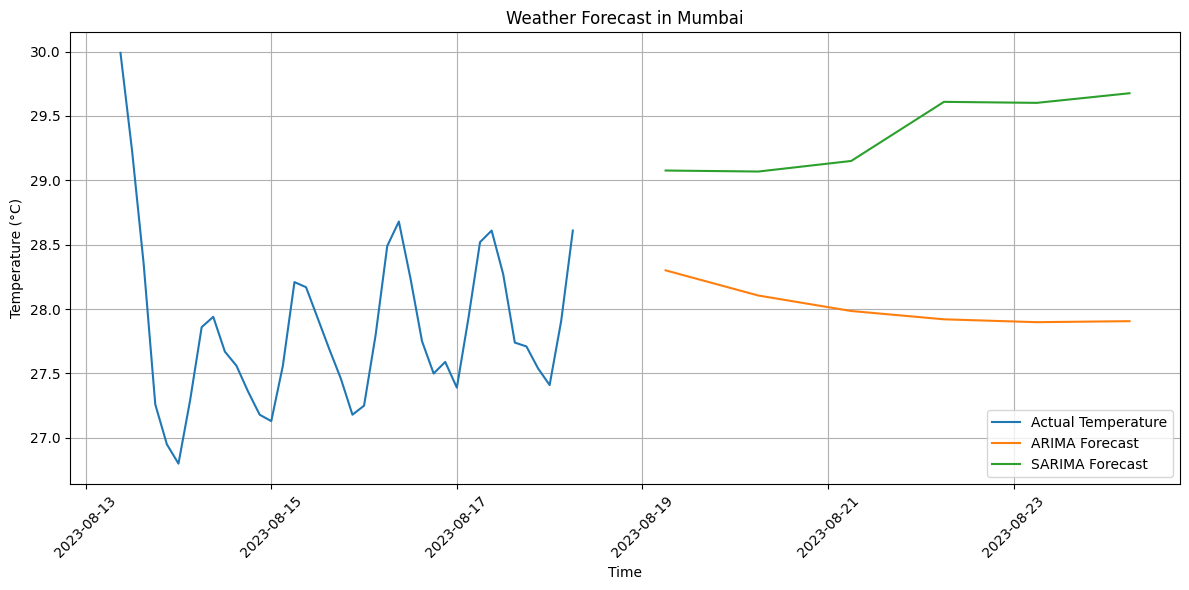